# Covid 19 Data Analysis

# Group Number

### Group Members 
**Andrews Truman 0824852**

**Melvin Kozhikkadan Jolly 0801117**

**Jatin Kansra**

Here we are loading the necessary library for the analysis of our dataset.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv")
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515.0,1586.0,NaN
1,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734.0,5951.0,NaN
2,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951.0,15567.0,NaN
3,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142.0,38596.0,NaN
4,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876.0,84875.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546475,03/12/2023,11/01/2022,11/30/2022,By Month,2022.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
546476,03/12/2023,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169.0,169.0,NaN
546477,03/12/2023,01/01/2023,01/31/2023,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166.0,166.0,NaN
546478,03/12/2023,02/01/2023,02/28/2023,By Month,2023.0,2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,85.0,85.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546480 entries, 0 to 546479
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          546480 non-null  object 
 1   Start Date          546480 non-null  object 
 2   End Date            546480 non-null  object 
 3   Group               546480 non-null  object 
 4   Year                534060 non-null  float64
 5   Month               484380 non-null  float64
 6   State               546480 non-null  object 
 7   Condition Group     546480 non-null  object 
 8   Condition           546480 non-null  object 
 9   ICD10_codes         546480 non-null  object 
 10  Age Group           546480 non-null  object 
 11  COVID-19 Deaths     386294 non-null  float64
 12  Number of Mentions  391455 non-null  float64
 13  Flag                160186 non-null  object 
dtypes: float64(4), object(10)
memory usage: 58.4+ MB


### Cleaning the Covid-19 dataset.

We have 546480 rows and 14 columns in the dataset. Here we have na values in the year, month and flag column. So we are finding the number of na values in each column to find out whether the column is appropriate or not.

In [4]:
df.isna().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       160186
Number of Mentions    155025
Flag                  386294
dtype: int64

In [5]:
df[df["COVID-19 Deaths"].isnull()]

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
241,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,25-34,NaN,NaN,One or more data cells have counts between 1-9...
250,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Adult respiratory distress syndrome,J80,0-24,NaN,NaN,One or more data cells have counts between 1-9...
270,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Respiratory arrest,R09.2,0-24,NaN,NaN,One or more data cells have counts between 1-9...
280,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",0-24,NaN,NaN,One or more data cells have counts between 1-9...
301,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,Alabama,Circulatory diseases,Ischemic heart disease,I20-I25,25-34,NaN,NaN,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546385,03/12/2023,11/01/2021,11/30/2021,By Month,2021.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,85+,NaN,NaN,One or more data cells have counts between 1-9...
546401,03/12/2023,03/01/2023,03/11/2023,By Month,2023.0,3.0,Puerto Rico,COVID-19,COVID-19,U071,85+,NaN,NaN,One or more data cells have counts between 1-9...
546418,03/12/2023,05/01/2021,05/31/2021,By Month,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,Not stated,NaN,NaN,One or more data cells have counts between 1-9...
546426,03/12/2023,01/01/2022,01/31/2022,By Month,2022.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,Not stated,NaN,NaN,One or more data cells have counts between 1-9...


There are missing values in the Covid-19 Deaths and Number of Mentions. Since, the total number of missing values are more we are just dropping the empty rows of these two columns.

In [6]:
df = df.dropna(subset=['COVID-19 Deaths', 'Number of Mentions'])
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515.0,1586.0,NaN
1,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734.0,5951.0,NaN
2,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951.0,15567.0,NaN
3,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142.0,38596.0,NaN
4,03/12/2023,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876.0,84875.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546474,03/12/2023,10/01/2022,10/31/2022,By Month,2022.0,10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
546475,03/12/2023,11/01/2022,11/30/2022,By Month,2022.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
546476,03/12/2023,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169.0,169.0,NaN
546477,03/12/2023,01/01/2023,01/31/2023,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166.0,166.0,NaN


In [7]:
df['Flag'].unique()

array([nan], dtype=object)

Here we can find that the flag column is inappropriate. Also, the **"Data As of"** indicates the date when the data is entered. So, we are droping the flag column and Data As of column.

In [8]:
df_dropedCol = df.drop(["Data As Of","Flag"],axis=1)
df_dropedCol

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515.0,1586.0
1,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734.0,5951.0
2,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951.0,15567.0
3,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142.0,38596.0
4,01/01/2020,03/11/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876.0,84875.0
...,...,...,...,...,...,...,...,...,...,...,...,...
546474,10/01/2022,10/31/2022,By Month,2022.0,10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0
546475,11/01/2022,11/30/2022,By Month,2022.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0
546476,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169.0,169.0
546477,01/01/2023,01/31/2023,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166.0,166.0


Here we are going to convert the data type to the correct variable type

In [9]:
def transforming(colname):
    df_dropedCol[colname] = df_dropedCol[colname].astype("category")
transform_cols = ["Group","State","Condition Group","Condition","Age Group"]


In [10]:
for cols in transform_cols:
    transforming(cols)

In [11]:
df_dropedCol['COVID-19 Deaths'] = df_dropedCol['COVID-19 Deaths'].astype(int)
df_dropedCol['Number of Mentions'] = df_dropedCol['Number of Mentions'].astype(int)

In [12]:
df_dropedCol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386294 entries, 0 to 546478
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Start Date          386294 non-null  object  
 1   End Date            386294 non-null  object  
 2   Group               386294 non-null  category
 3   Year                375600 non-null  float64 
 4   Month               337303 non-null  float64 
 5   State               386294 non-null  category
 6   Condition Group     386294 non-null  category
 7   Condition           386294 non-null  category
 8   ICD10_codes         386294 non-null  object  
 9   Age Group           386294 non-null  category
 10  COVID-19 Deaths     386294 non-null  int32   
 11  Number of Mentions  386294 non-null  int32   
dtypes: category(5), float64(2), int32(2), object(3)
memory usage: 22.5+ MB


Here, we are going to convert the date columns to datetime format

In [13]:
df_dropedCol["Start Date"] = pd.to_datetime(df_dropedCol["Start Date"]).dt.date
df_dropedCol["End Date"] = pd.to_datetime(df_dropedCol["End Date"]).dt.date
df_dropedCol

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515,1586
1,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734,5951
2,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951,15567
3,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142,38596
4,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876,84875
...,...,...,...,...,...,...,...,...,...,...,...,...
546474,2022-10-01,2022-10-31,By Month,2022.0,10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117,117
546475,2022-11-01,2022-11-30,By Month,2022.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124,124
546476,2022-12-01,2022-12-31,By Month,2022.0,12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169,169
546477,2023-01-01,2023-01-31,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166,166


In [14]:
df_dropedCol['Group'].unique()

['By Total', 'By Year', 'By Month']
Categories (3, object): ['By Month', 'By Total', 'By Year']

Here the data is recorded by whole year, month and by total. So we splitting the data by this cateogry 

### Subsetting the dataset where the data is collected for 3 years

In [15]:
df_total = df_dropedCol[df_dropedCol["Group"] == "By Total"]
df_total

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515,1586
1,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734,5951
2,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951,15567
3,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142,38596
4,2020-01-01,2023-03-11,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876,84875
...,...,...,...,...,...,...,...,...,...,...,...,...
12414,2020-01-01,2023-03-11,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,55-64,766,766
12415,2020-01-01,2023-03-11,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,65-74,1206,1206
12416,2020-01-01,2023-03-11,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,75-84,1569,1569
12417,2020-01-01,2023-03-11,By Total,NaN,NaN,Puerto Rico,COVID-19,COVID-19,U071,85+,1603,1603


Here year and month is empty and is irrelevant too. So we are removing the columns form this dataframe.

In [16]:
df_total = df_total.drop(["Year","Month"],axis =  1)
df_total

,Start Date,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515,1586
1,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734,5951
2,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951,15567
3,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142,38596
4,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876,84875
...,...,...,...,...,...,...,...,...,...,...
12414,2020-01-01,2023-03-11,By Total,Puerto Rico,COVID-19,COVID-19,U071,55-64,766,766
12415,2020-01-01,2023-03-11,By Total,Puerto Rico,COVID-19,COVID-19,U071,65-74,1206,1206
12416,2020-01-01,2023-03-11,By Total,Puerto Rico,COVID-19,COVID-19,U071,75-84,1569,1569
12417,2020-01-01,2023-03-11,By Total,Puerto Rico,COVID-19,COVID-19,U071,85+,1603,1603


### Subsetting the dataset for the data collected in each year

In [17]:
df_year = df_dropedCol[df_dropedCol["Group"] == "By Year"]
df_year

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
12420,2020-01-01,2020-12-31,By Year,2020.0,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256
12421,2021-01-01,2021-12-31,By Year,2021.0,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933
12422,2022-01-01,2022-12-31,By Year,2022.0,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,357,379
12423,2023-01-01,2023-03-11,By Year,2023.0,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,16,18
12424,2020-01-01,2020-12-31,By Year,2020.0,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1112,1131
...,...,...,...,...,...,...,...,...,...,...,...,...
62095,2023-01-01,2023-03-11,By Year,2023.0,NaN,Puerto Rico,COVID-19,COVID-19,U071,Not stated,0,0
62096,2020-01-01,2020-12-31,By Year,2020.0,NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,1629,1629
62097,2021-01-01,2021-12-31,By Year,2021.0,NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,1645,1645
62098,2022-01-01,2022-12-31,By Year,2022.0,NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,2348,2348


In [18]:
df_year = df_year.drop("Month",axis =  1)

In [19]:
df_year['Year'] = df_year['Year'].astype(int)

In [20]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38297 entries, 12420 to 62099
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Start Date          38297 non-null  object  
 1   End Date            38297 non-null  object  
 2   Group               38297 non-null  category
 3   Year                38297 non-null  int32   
 4   State               38297 non-null  category
 5   Condition Group     38297 non-null  category
 6   Condition           38297 non-null  category
 7   ICD10_codes         38297 non-null  object  
 8   Age Group           38297 non-null  category
 9   COVID-19 Deaths     38297 non-null  int32   
 10  Number of Mentions  38297 non-null  int32   
dtypes: category(5), int32(3), object(3)
memory usage: 1.8+ MB


### Subsetting the dataset for the data collected in each month

In [21]:
df_month = df_dropedCol[df_dropedCol["Group"] == "By Month"]
df_month

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
62100,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0
62101,2020-02-01,2020-02-29,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0
62102,2020-03-01,2020-03-31,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,9
62103,2020-04-01,2020-04-30,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27,30
62104,2020-05-01,2020-05-31,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
546474,2022-10-01,2022-10-31,By Month,2022.0,10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117,117
546475,2022-11-01,2022-11-30,By Month,2022.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124,124
546476,2022-12-01,2022-12-31,By Month,2022.0,12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169,169
546477,2023-01-01,2023-01-31,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166,166


In [22]:
df_month["Year"] = df_month["Year"].astype(int)
df_month["Month"] = df_month["Month"].astype(int)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20624\4061284128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Year"] = df_month["Year"].astype(int)
C:\Users\Owner\AppData\Local\Temp\ipykernel_20624\4061284128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Month"] = df_month["Month"].astype(int)


In [23]:
df_month
df_month1 = df_month.copy()

In [24]:
df_month1["End Date"] = pd.to_datetime(df_month1["End Date"])

# Extract the week ending date from the "Date" column
df_month1["Week Ending Date"] = df_month1["End Date"] + pd.DateOffset(days=6) - pd.to_timedelta(df_month1["End Date"].dt.dayofweek, unit='D')
df_month1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337303 entries, 62100 to 546478
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start Date          337303 non-null  object        
 1   End Date            337303 non-null  datetime64[ns]
 2   Group               337303 non-null  category      
 3   Year                337303 non-null  int32         
 4   Month               337303 non-null  int32         
 5   State               337303 non-null  category      
 6   Condition Group     337303 non-null  category      
 7   Condition           337303 non-null  category      
 8   ICD10_codes         337303 non-null  object        
 9   Age Group           337303 non-null  category      
 10  COVID-19 Deaths     337303 non-null  int32         
 11  Number of Mentions  337303 non-null  int32         
 12  Week Ending Date    337303 non-null  datetime64[ns]
dtypes: category(5), datetime6

### We have completed the cleaning process and now we will try to answer our analysis questions.

### 1. What are the top five health conditions that contributed to COVID-19-related deaths across age groups that is less than 45 years?

In [25]:
grouped_df = df_total[df_total["State"]=="United States"]
grouped_df

,Start Date,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1515,1586
1,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5734,5951
2,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14951,15567
3,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37142,38596
4,2020-01-01,2023-03-11,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81876,84875
...,...,...,...,...,...,...,...,...,...,...
225,2020-01-01,2023-03-11,By Total,United States,COVID-19,COVID-19,U071,65-74,251499,251499
226,2020-01-01,2023-03-11,By Total,United States,COVID-19,COVID-19,U071,75-84,291191,291191
227,2020-01-01,2023-03-11,By Total,United States,COVID-19,COVID-19,U071,85+,300544,300544
228,2020-01-01,2023-03-11,By Total,United States,COVID-19,COVID-19,U071,Not stated,24,24


In [26]:
grouped_df = grouped_df.groupby(["Age Group","Condition Group"])["COVID-19 Deaths"].sum().reset_index()
grouped_df = grouped_df.sort_values(["Age Group","COVID-19 Deaths"],ascending=[True,False])
grouped_df

,Age Group,Condition Group,COVID-19 Deaths
2,0-24,COVID-19,4092
9,0-24,Respiratory diseases,3649
0,0-24,All other conditions and causes (residual),2228
3,0-24,Circulatory diseases,1330
7,0-24,Obesity,696
...,...,...,...
115,Not stated,Obesity,2
118,Not stated,Sepsis,2
119,Not stated,Vascular and unspecified dementia,2
109,Not stated,Alzheimer disease,0


In [27]:
stat_df= grouped_df.groupby("Condition Group")["COVID-19 Deaths"].sum()
stat_df = stat_df.reset_index(name='Total COVID-19 Deaths')
stat_df = stat_df.iloc[[0,3,4,7,9,10]]
stat_df


,Condition Group,Total COVID-19 Deaths
0,All other conditions and causes (residual),923556
3,Circulatory diseases,1586110
4,Diabetes,330200
7,Obesity,105362
9,Respiratory diseases,2485612
10,Sepsis,231268


In [28]:
grouped_df["COVID-19 Deaths"].sum()

8591194

In [29]:
for ages_group in grouped_df["Age Group"].unique():
    print(f"Top 5 health conditions contributing to COVID-19-related deaths in {ages_group}:")
    print(grouped_df[grouped_df["Age Group"] == ages_group].head(5))

Top 5 health conditions contributing to COVID-19-related deaths in 0-24:
  Age Group                             Condition Group  COVID-19 Deaths
2      0-24                                    COVID-19             4092
9      0-24                        Respiratory diseases             3649
0      0-24  All other conditions and causes (residual)             2228
3      0-24                        Circulatory diseases             1330
7      0-24                                     Obesity              696
Top 5 health conditions contributing to COVID-19-related deaths in 25-34:
   Age Group                             Condition Group  COVID-19 Deaths
21     25-34                        Respiratory diseases            12994
14     25-34                                    COVID-19            12107
12     25-34  All other conditions and causes (residual)             5260
15     25-34                        Circulatory diseases             4780
19     25-34                                 

In [30]:
top_conditions_df = pd.DataFrame()
age_groups = ["0-24", "25-34", "35-44"]
for age_group in age_groups:
    top_conditions = grouped_df[(grouped_df["Age Group"] == age_group) & (grouped_df["Condition Group"] != "COVID-19")].head(5)
    top_conditions_df = pd.concat([top_conditions_df, top_conditions])

In [31]:
top_conditions_df = top_conditions_df.drop("Age Group",axis = 1).reset_index()
#top_conditions_df = top_conditions_df.groupby("Condition Group")["COVID-19 Deaths"].sum()
top_conditions_df

,index,Condition Group,COVID-19 Deaths
0,9,Respiratory diseases,3649
1,0,All other conditions and causes (residual),2228
2,3,Circulatory diseases,1330
3,7,Obesity,696
4,10,Sepsis,405
5,21,Respiratory diseases,12994
6,12,All other conditions and causes (residual),5260
7,15,Circulatory diseases,4780
8,19,Obesity,2828
9,22,Sepsis,1365


In [32]:
top_conditions_df[top_conditions_df["Condition Group"] == "Malignant neoplasms"]

,index,Condition Group,COVID-19 Deaths


In [33]:
top_conditions_df= top_conditions_df.groupby("Condition Group")["COVID-19 Deaths"].sum()
top_conditions_df = top_conditions_df.reset_index(name='COVID-19 Deaths')
top_conditions_df = top_conditions_df[top_conditions_df["COVID-19 Deaths"] > 0]
top_conditions_df["COVID-19 Deaths per 100000"] = (top_conditions_df["COVID-19 Deaths"] / 331900000) * 100000
top_conditions_df

,Condition Group,COVID-19 Deaths,COVID-19 Deaths per 100000
0,All other conditions and causes (residual),19688,5.931907
3,Circulatory diseases,19904,5.996987
4,Diabetes,4230,1.274480
7,Obesity,9378,2.825550
9,Respiratory diseases,50545,15.228985
10,Sepsis,1770,0.533293


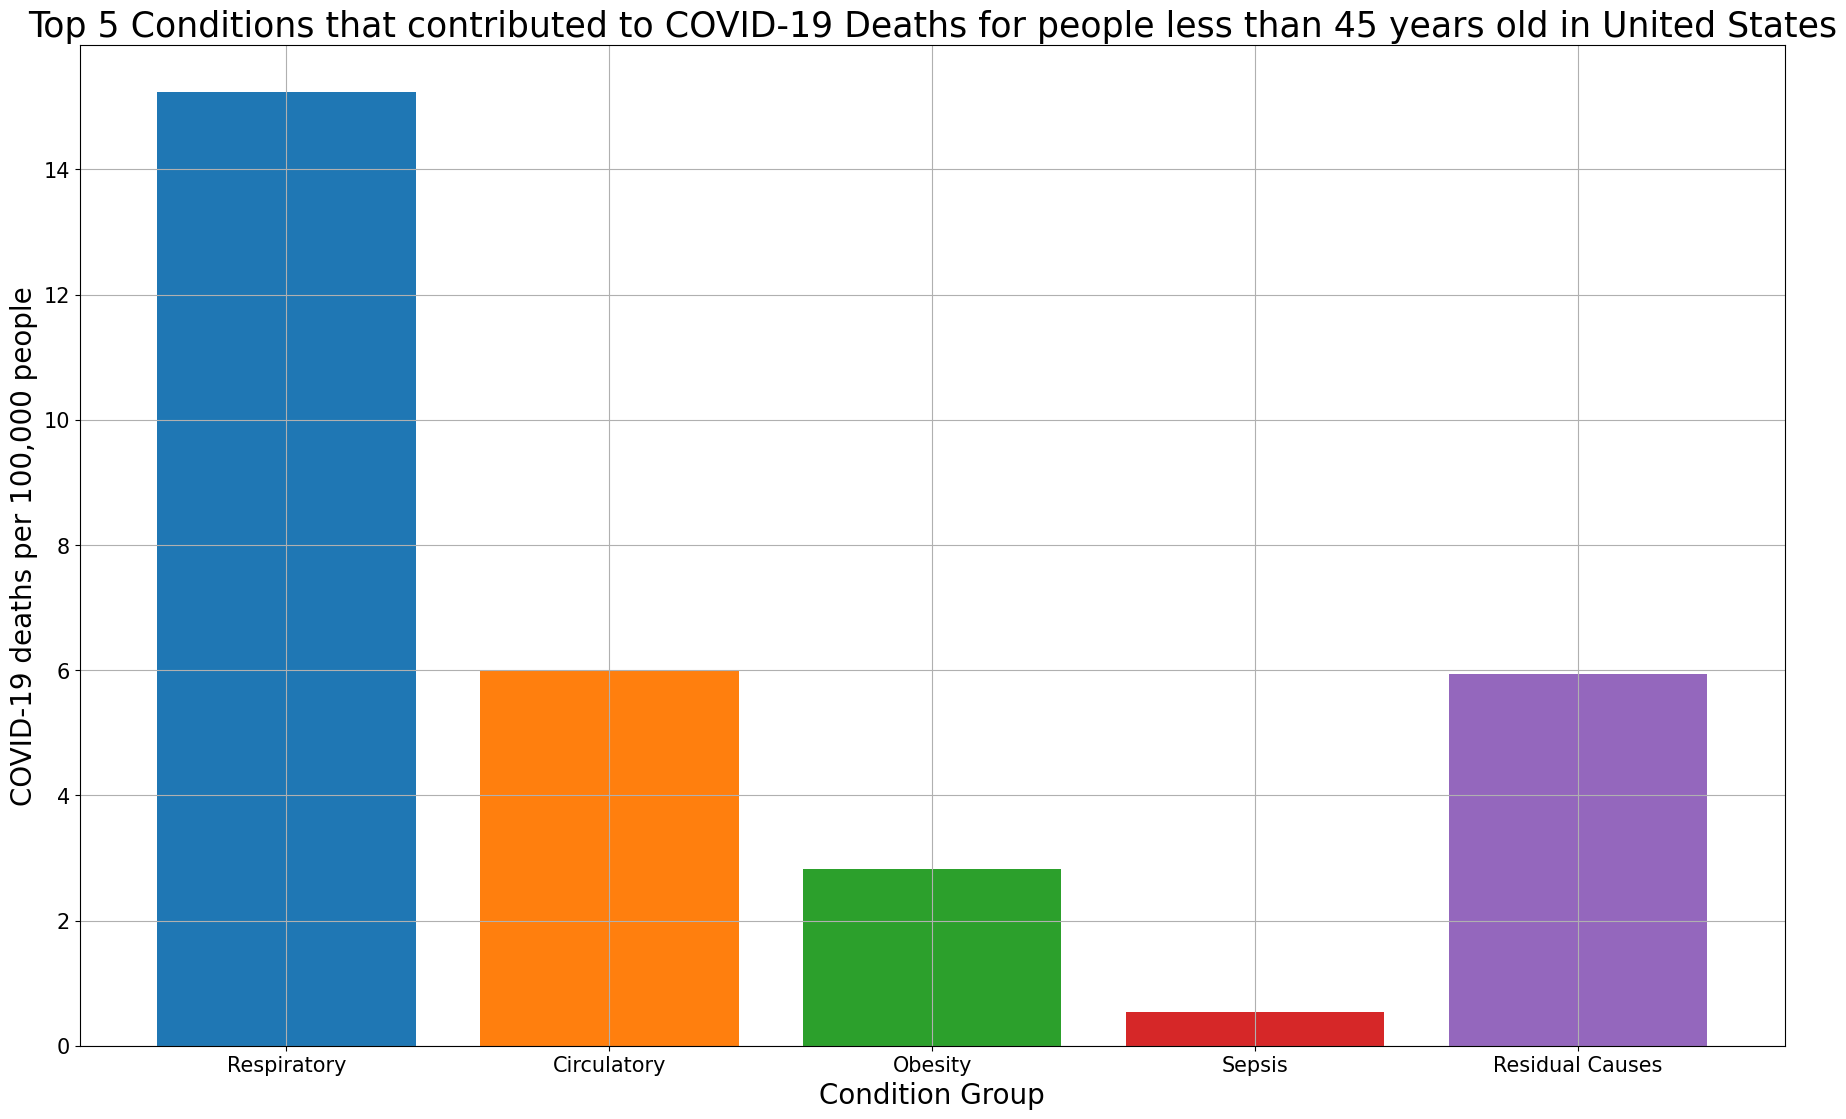

In [34]:
# Create a copy of the dataframe and set the condition group column as the index
sorted_df = top_conditions_df.set_index("Condition Group").copy()

# Move the "Respiratory diseases" row to the end of the dataframe
sorted_df = sorted_df.reindex(["Respiratory diseases",
                               "Circulatory diseases",
                               "Obesity",
                               "Sepsis",
                              "All other conditions and causes (residual)"])

# Reset the index to a regular column
sorted_df = sorted_df.reset_index()

# Define colors for each bar
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Plot the bar chart with the sorted dataframe
fig = plt.figure(figsize=(22, 13))
plt.bar(sorted_df["Condition Group"], sorted_df["COVID-19 Deaths per 100000"], color=colors)

# Customize the plot
plt.title("Top 5 Conditions that contributed to COVID-19 Deaths for people less than 45 years old in United States", fontsize=25)
plt.xlabel("Condition Group", fontsize=20)
plt.ylabel("COVID-19 deaths per 100,000 people", fontsize=20)
plt.xticks(fontsize=15, ticks=[0, 1, 2, 3, 4], labels=["Respiratory", "Circulatory", "Obesity", "Sepsis", "Residual Causes"])
plt.yticks(fontsize=15)
plt.grid()
plt.show()


###  2) How have COVID-19 related deaths with preexisting health conditions changed over time?


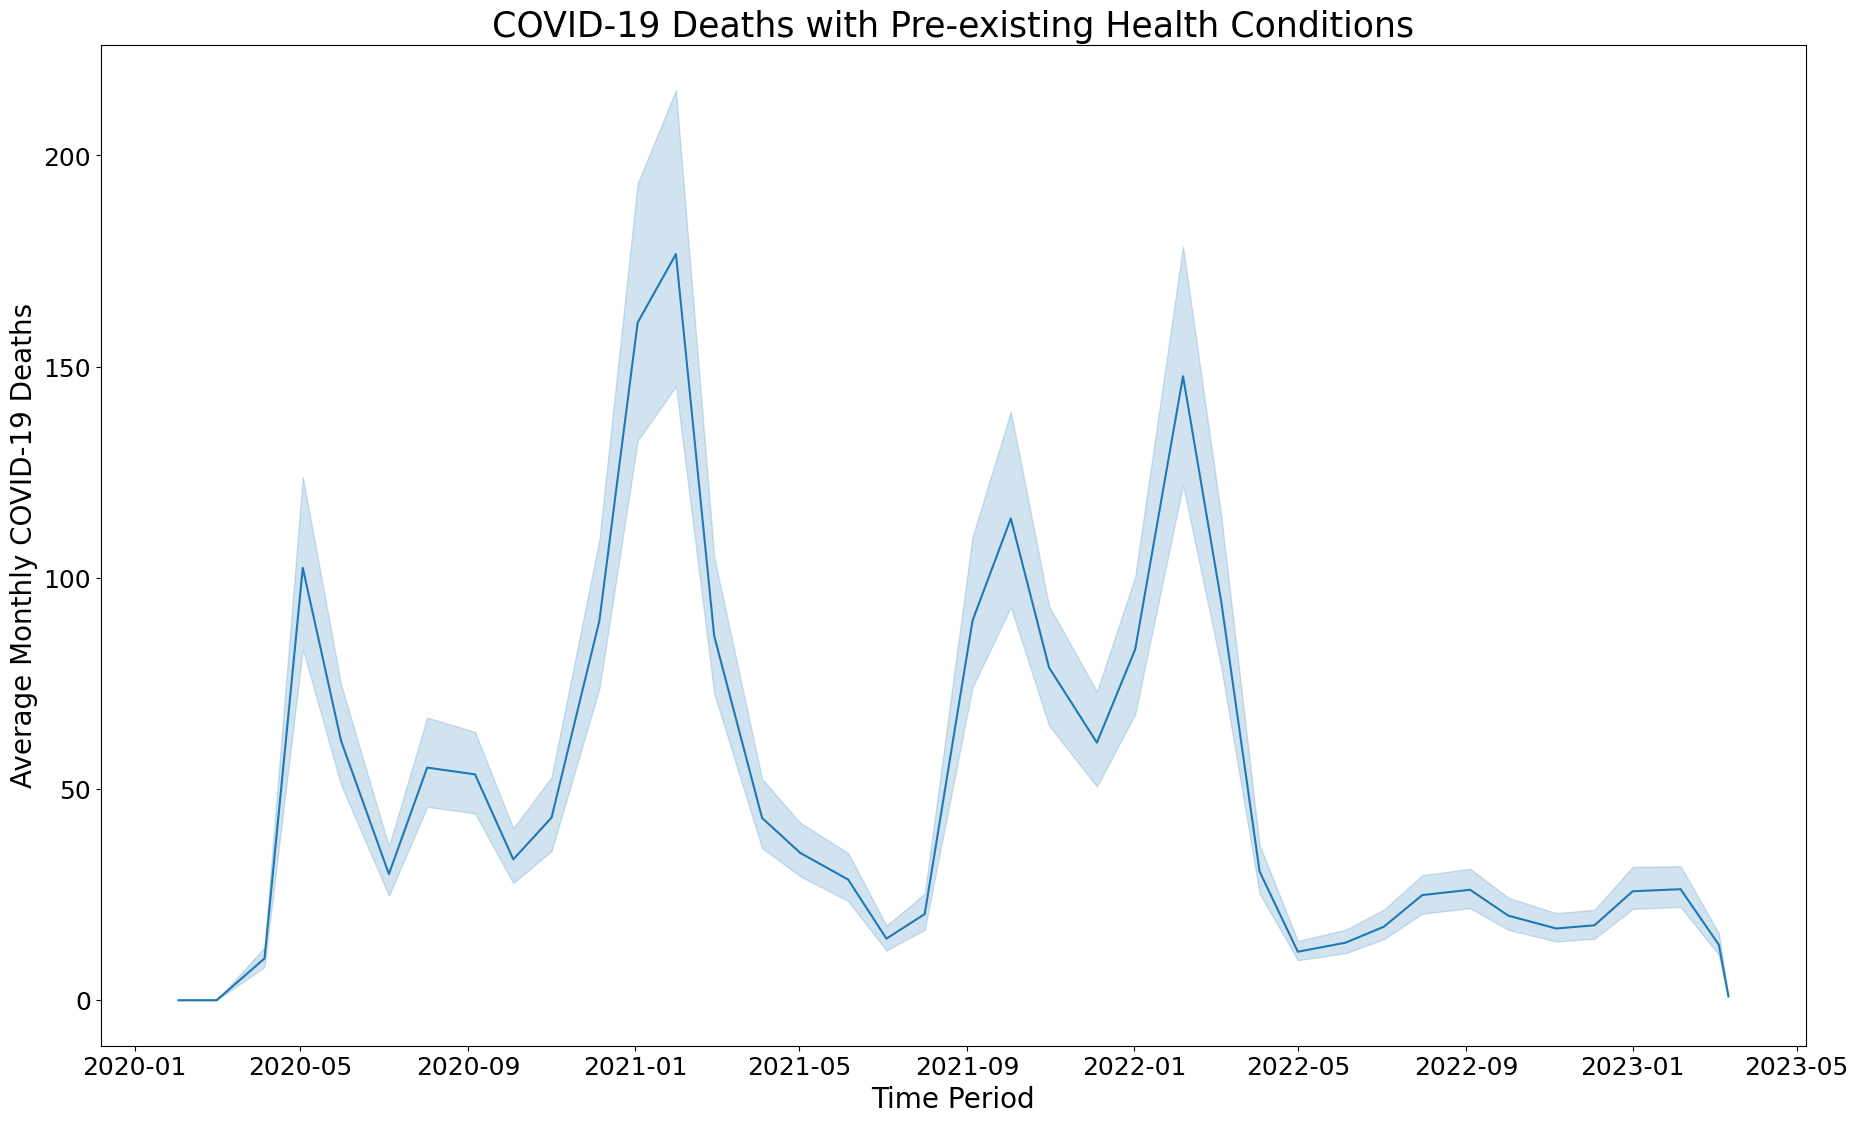

In [35]:
df_total1 = df_month1[["Week Ending Date", "COVID-19 Deaths"]]
# create line plot of proportion over time
fig = plt.figure(figsize=(22, 13))
sns.lineplot(data=df_total1, x="Week Ending Date", y="COVID-19 Deaths")
plt.title("COVID-19 Deaths with Pre-existing Health Conditions",fontsize = 25)
plt.xlabel("Time Period",fontsize = 20)
plt.ylabel("Average Monthly COVID-19 Deaths",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()


### 3. Is there a correlation between the age of individuals with obesity and the severity of their COVID-19 cases??

In [36]:
dfq3 = grouped_df[(grouped_df["Age Group"] != "All Ages") & (grouped_df["Age Group"] != "Not stated")]
dfq3["Average Age"] = dfq3["Age Group"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in x else 85)
dfq3

C:\Users\Owner\AppData\Local\Temp\ipykernel_20624\3553470504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq3["Average Age"] = dfq3["Age Group"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in x else 85)


,Age Group,Condition Group,COVID-19 Deaths,Average Age
2,0-24,COVID-19,4092,12.0
9,0-24,Respiratory diseases,3649,12.0
0,0-24,All other conditions and causes (residual),2228,12.0
3,0-24,Circulatory diseases,1330,12.0
7,0-24,Obesity,696,12.0
...,...,...,...,...
85,85+,Alzheimer disease,21293,85.0
94,85+,Sepsis,18258,85.0
90,85+,Malignant neoplasms,14816,85.0
89,85+,"Intentional and unintentional injury, poisonin...",7862,85.0


In [37]:
df_month

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
62100,2020-01-01,2020-01-31,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0
62101,2020-02-01,2020-02-29,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0
62102,2020-03-01,2020-03-31,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,9
62103,2020-04-01,2020-04-30,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27,30
62104,2020-05-01,2020-05-31,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
546474,2022-10-01,2022-10-31,By Month,2022,10,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117,117
546475,2022-11-01,2022-11-30,By Month,2022,11,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124,124
546476,2022-12-01,2022-12-31,By Month,2022,12,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169,169
546477,2023-01-01,2023-01-31,By Month,2023,1,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166,166


In [38]:
dfq3["Condition Group"].value_counts()

All other conditions and causes (residual)                                   8
Alzheimer disease                                                            8
COVID-19                                                                     8
Circulatory diseases                                                         8
Diabetes                                                                     8
Intentional and unintentional injury, poisoning, and other adverse events    8
Malignant neoplasms                                                          8
Obesity                                                                      8
Renal failure                                                                8
Respiratory diseases                                                         8
Sepsis                                                                       8
Vascular and unspecified dementia                                            8
Name: Condition Group, dtype: int64

In [39]:
df_month["State"].value_counts()

United States           8970
Vermont                 7059
California              6827
Alaska                  6808
Texas                   6785
Wyoming                 6772
Florida                 6721
District of Columbia    6529
Maine                   6519
Hawaii                  6512
Ohio                    6510
Pennsylvania            6506
New Hampshire           6346
Kentucky                6323
North Carolina          6318
Rhode Island            6313
Montana                 6312
New Jersey              6286
Michigan                6257
New York                6252
North Dakota            6235
Illinois                6225
West Virginia           6204
Tennessee               6198
Indiana                 6187
Virginia                6179
South Dakota            6135
Georgia                 6134
Delaware                6128
Idaho                   6127
Minnesota               6109
Wisconsin               6096
Connecticut             6075
Massachusetts           6067
Maryland      

In [40]:
dfq31

NameError: name 'dfq31' is not defined

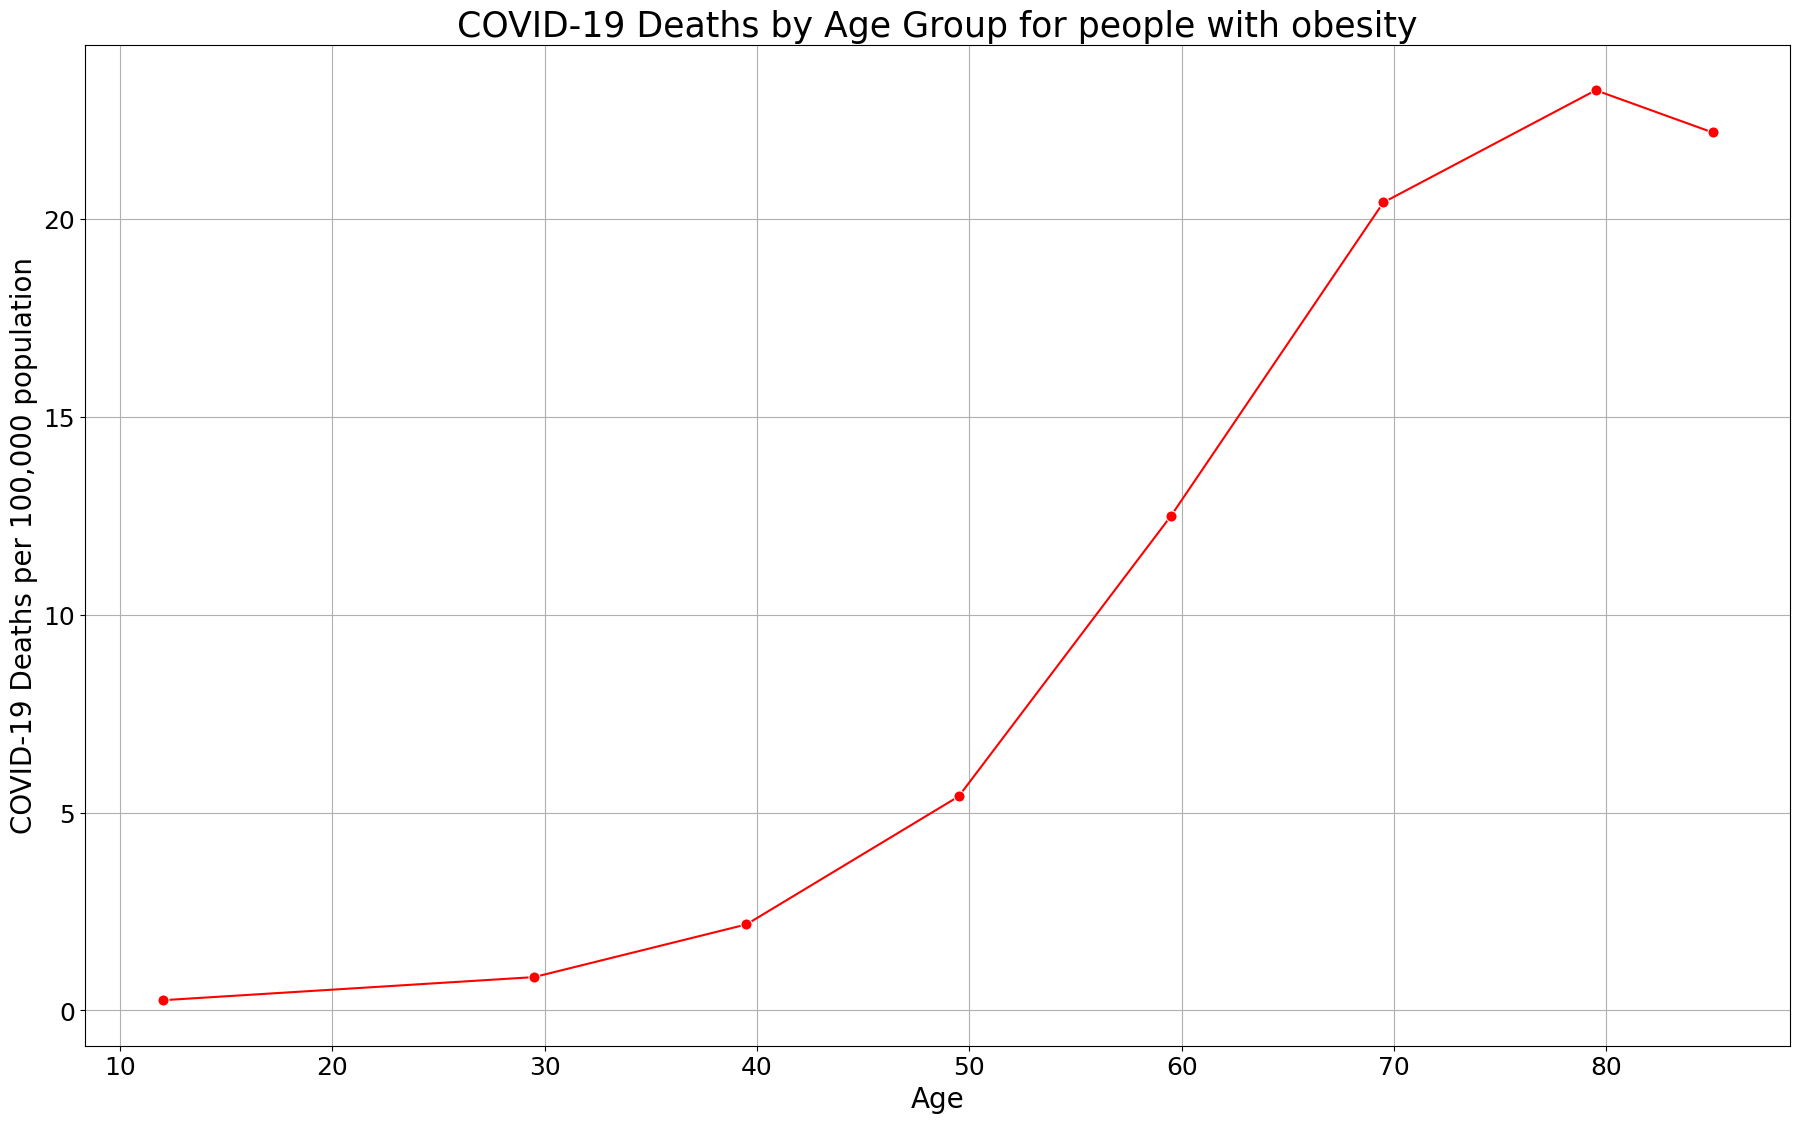

In [41]:
dfq3 = dfq3[dfq3['Condition Group'] != 'COVID-19']
dfq31 = dfq3[dfq3["Condition Group"]=="Obesity"]
dfq31 = dfq3[dfq3["Condition Group"]!="United States"]
# group the data by age group and calculate the average age and severity for each group
grouped_df = dfq31.groupby(['Age Group'])[['COVID-19 Deaths', 'Average Age']].mean().reset_index()
grouped_df["COVID-19 Deaths per 100000"] = (grouped_df["COVID-19 Deaths"] / 331900000) * 100000

fig = plt.figure(figsize=(22, 13))

# create a scatter plot of age vs. severity with annotations
sns.scatterplot(data=grouped_df, x='Average Age', y='COVID-19 Deaths per 100000')
sns.lineplot(data=grouped_df, x='Average Age', y='COVID-19 Deaths per 100000', color='red', marker='o', markersize=8)
#sns.regplot(data=grouped_df, x='Average Age', y='COVID-19 Deaths', scatter=False)
plt.annotate('Highest COVID-19 Death Rate', xy=(75, 2000), xytext=(60, 4000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('COVID-19 Deaths by Age Group for people with obesity',fontsize = 25)
plt.xlabel('Age',fontsize = 20)
plt.ylabel('COVID-19 Deaths per 100,000 population',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid()

In [42]:
correlation = grouped_df['Average Age'].corr(grouped_df['COVID-19 Deaths'])
print(correlation)

0.9459768300429422


### 4. Are there any age groups in Washington that are more vulnerable to COVID-19 deaths with preexisting respiratory conditions?

In [43]:
df_month

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
62100,2020-01-01,2020-01-31,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0
62101,2020-02-01,2020-02-29,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0
62102,2020-03-01,2020-03-31,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,9
62103,2020-04-01,2020-04-30,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27,30
62104,2020-05-01,2020-05-31,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
546474,2022-10-01,2022-10-31,By Month,2022,10,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117,117
546475,2022-11-01,2022-11-30,By Month,2022,11,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124,124
546476,2022-12-01,2022-12-31,By Month,2022,12,Puerto Rico,COVID-19,COVID-19,U071,All Ages,169,169
546477,2023-01-01,2023-01-31,By Month,2023,1,Puerto Rico,COVID-19,COVID-19,U071,All Ages,166,166


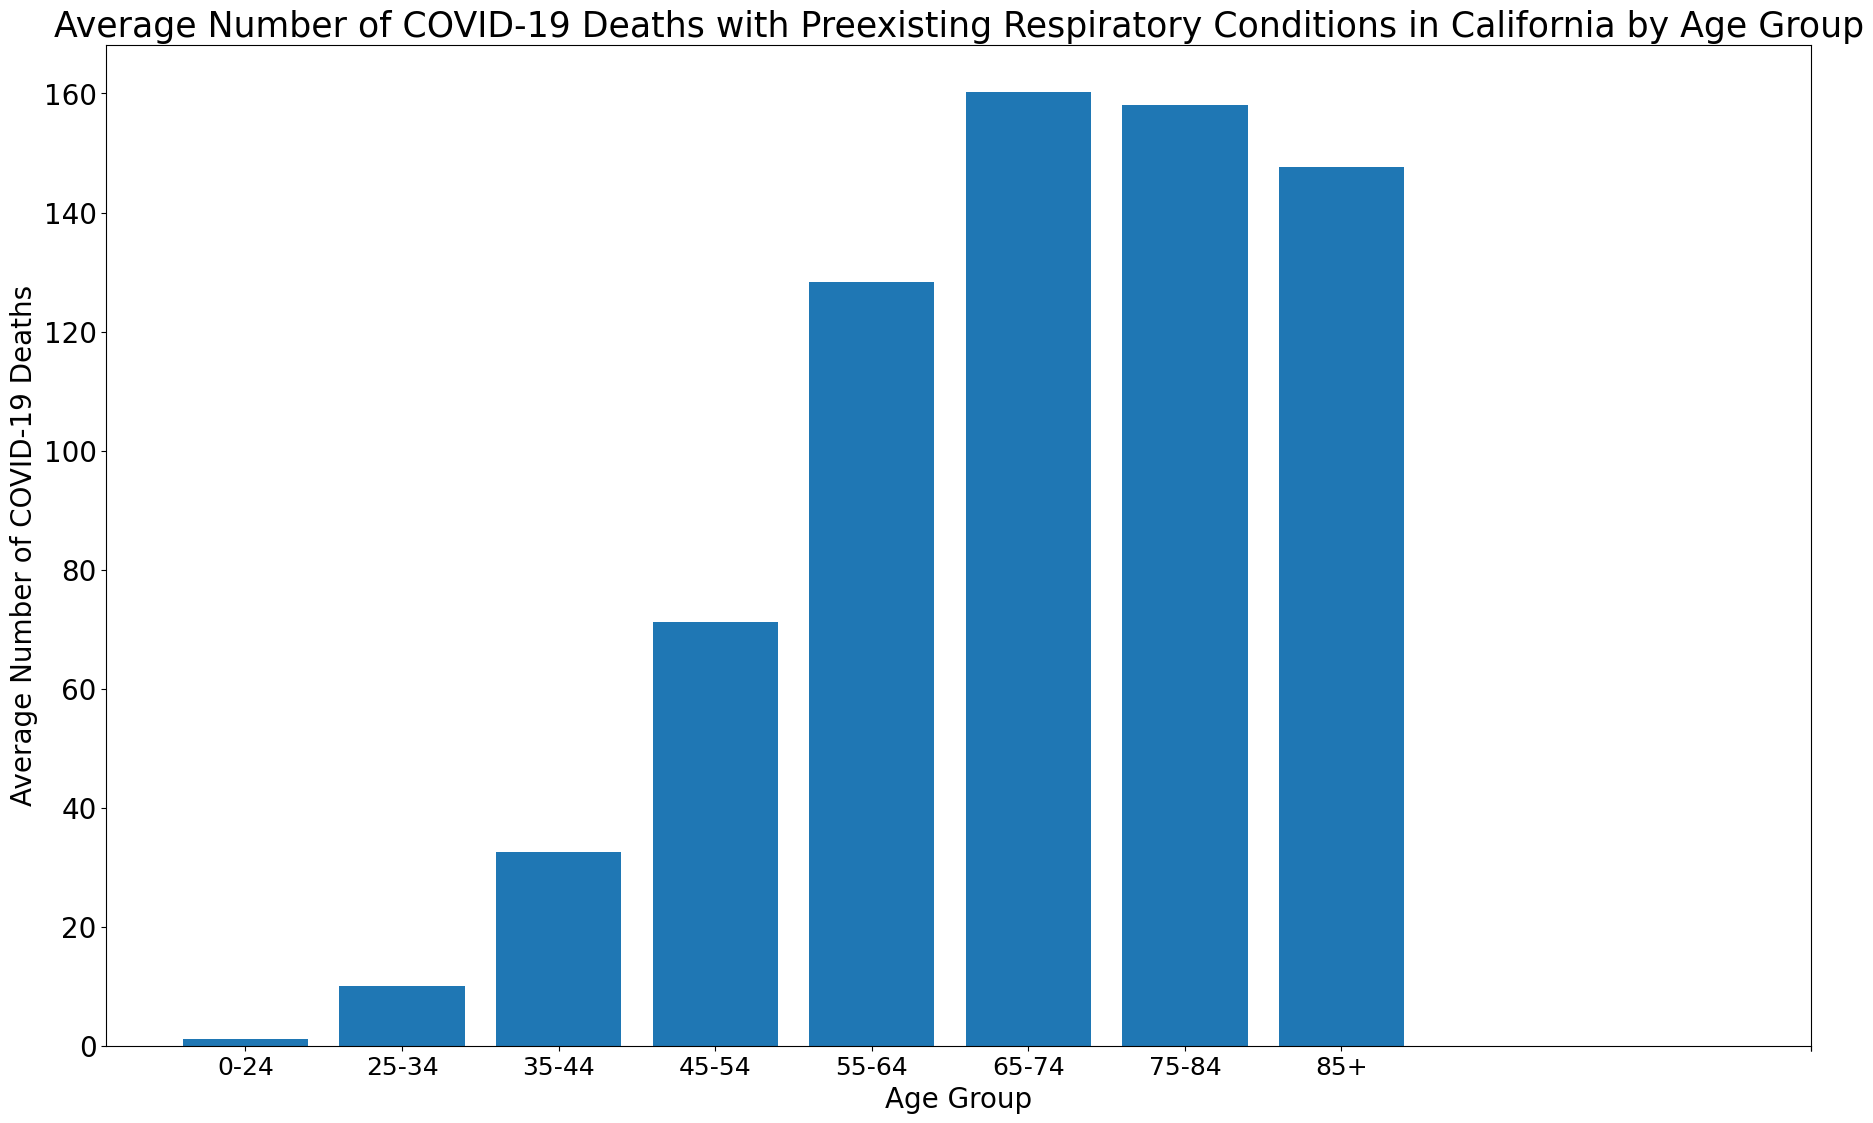

In [44]:

df_circulatory = df_month[(df_month['State']=='California') & (df_month['Condition Group']=='Respiratory diseases')]
df_circulatorydiseas = df_circulatory[(df_circulatory["Age Group"] != "All Ages") & (df_circulatory["Age Group"] != "Not Stated")]

# group the data by age group and calculate the average number of COVID-19 deaths
grouped_df = df_circulatorydiseas.groupby('Age Group')['COVID-19 Deaths'].mean().reset_index()
top_conditions_df["COVID-19 Deaths per 100000"] = (top_conditions_df["COVID-19 Deaths"] / 331900000) * 100000

fig = plt.figure(figsize=(22, 13))

# plot the data
plt.bar(grouped_df['Age Group'], grouped_df['COVID-19 Deaths'])
plt.title('Average Number of COVID-19 Deaths with Preexisting Respiratory Conditions in California by Age Group',fontsize = 25)
plt.xlabel('Age Group',fontsize = 20)
plt.ylabel('Average Number of COVID-19 Deaths',fontsize = 20)
plt.xticks(["0-24","25-34","35-44","45-54","55-64","65-74","75-84","85+","",""],fontsize = 18)
plt.yticks(fontsize = 20)
plt.show()

In [45]:
grouped_df = df_circulatorydiseas.groupby('Age Group')['COVID-19 Deaths'].mean().reset_index()
top_conditions_df["COVID-19 Deaths per 100000"] = (top_conditions_df["COVID-19 Deaths"] / 331900000) * 100000

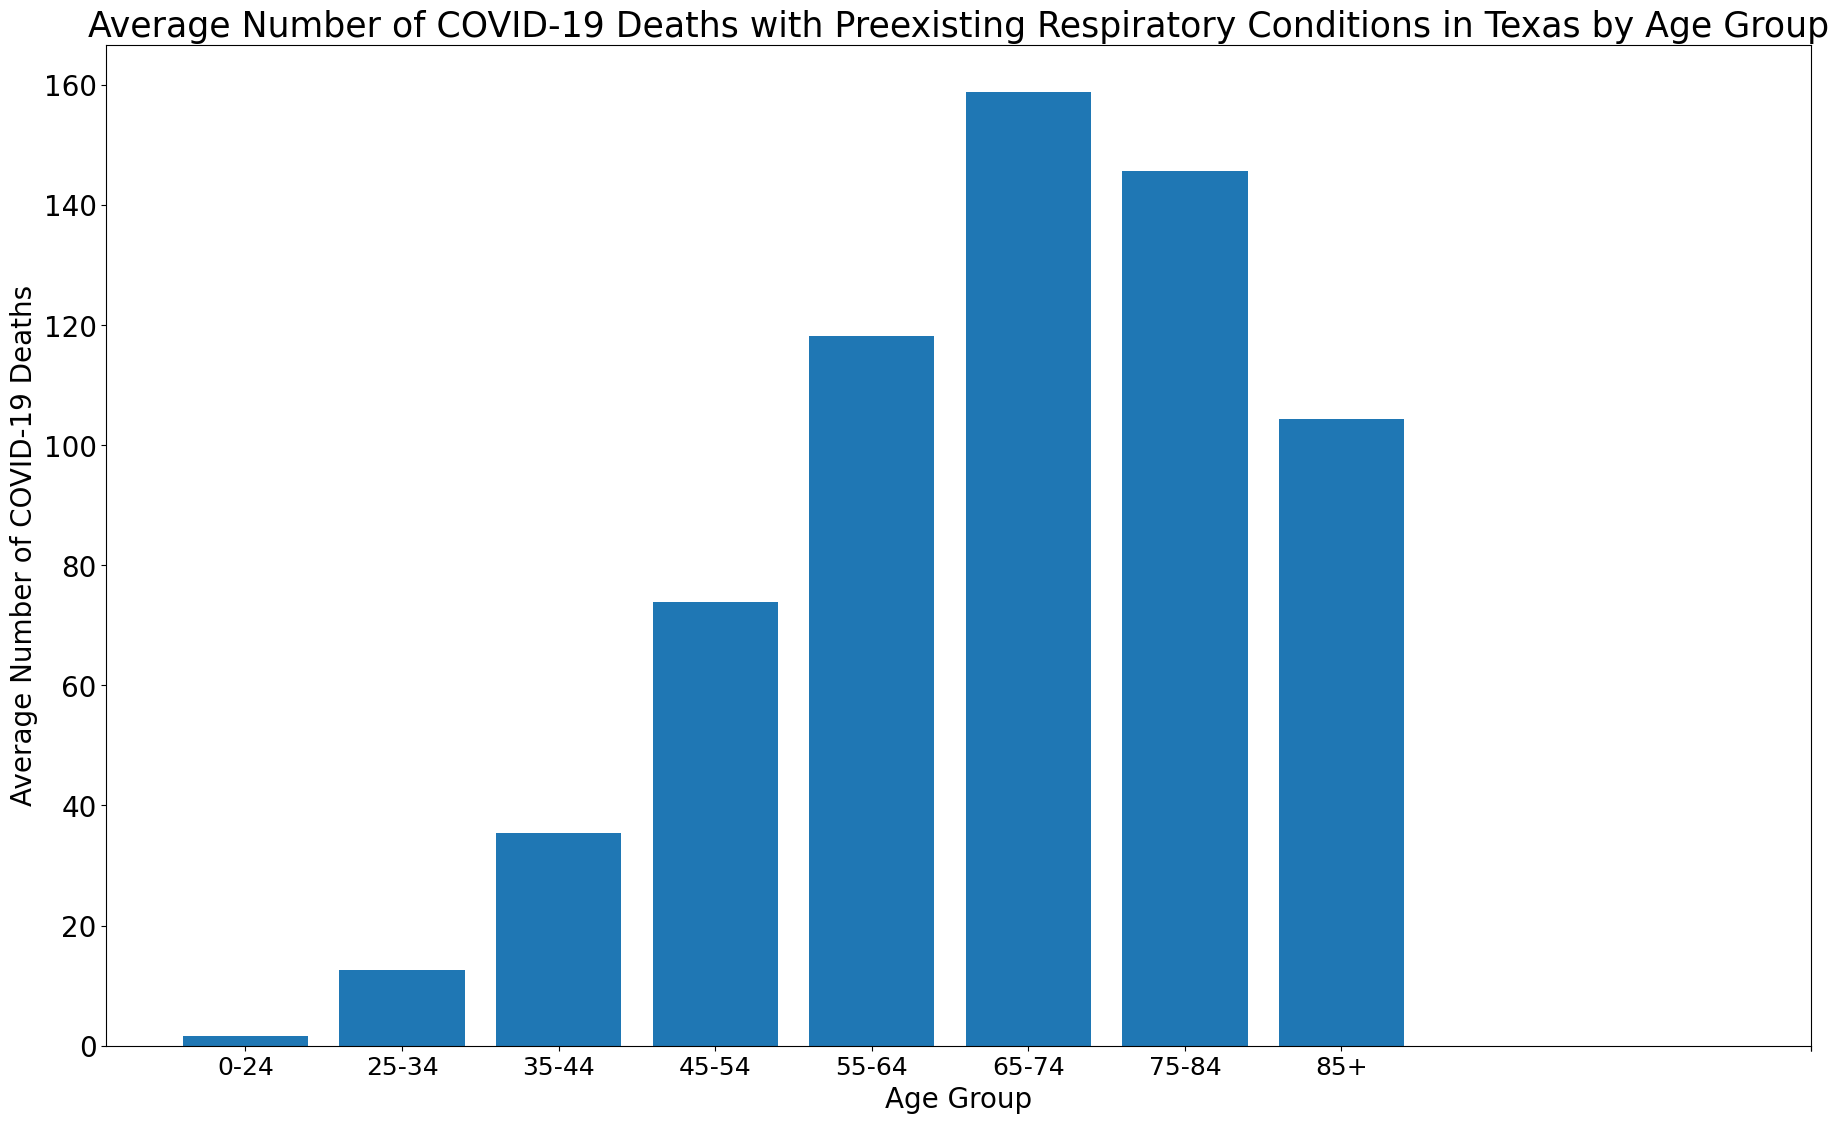

In [46]:

df_circulatory = df_month[(df_month['State']=='Texas') & (df_month['Condition Group']=='Respiratory diseases')]
df_circulatorydiseas = df_circulatory[(df_circulatory["Age Group"] != "All Ages") & (df_circulatory["Age Group"] != "Not Stated")]

# group the data by age group and calculate the average number of COVID-19 deaths
grouped_df = df_circulatorydiseas.groupby('Age Group')['COVID-19 Deaths'].mean().reset_index()

fig = plt.figure(figsize=(22, 13))

# plot the data
plt.bar(grouped_df['Age Group'], grouped_df['COVID-19 Deaths'])
plt.title('Average Number of COVID-19 Deaths with Preexisting Respiratory Conditions in Texas by Age Group',fontsize = 25)
plt.xlabel('Age Group',fontsize = 20)
plt.ylabel('Average Number of COVID-19 Deaths',fontsize = 20)
plt.xticks(["0-24","25-34","35-44","45-54","55-64","65-74","75-84","85+","",""],fontsize = 18)
plt.yticks(fontsize = 20)
plt.show()

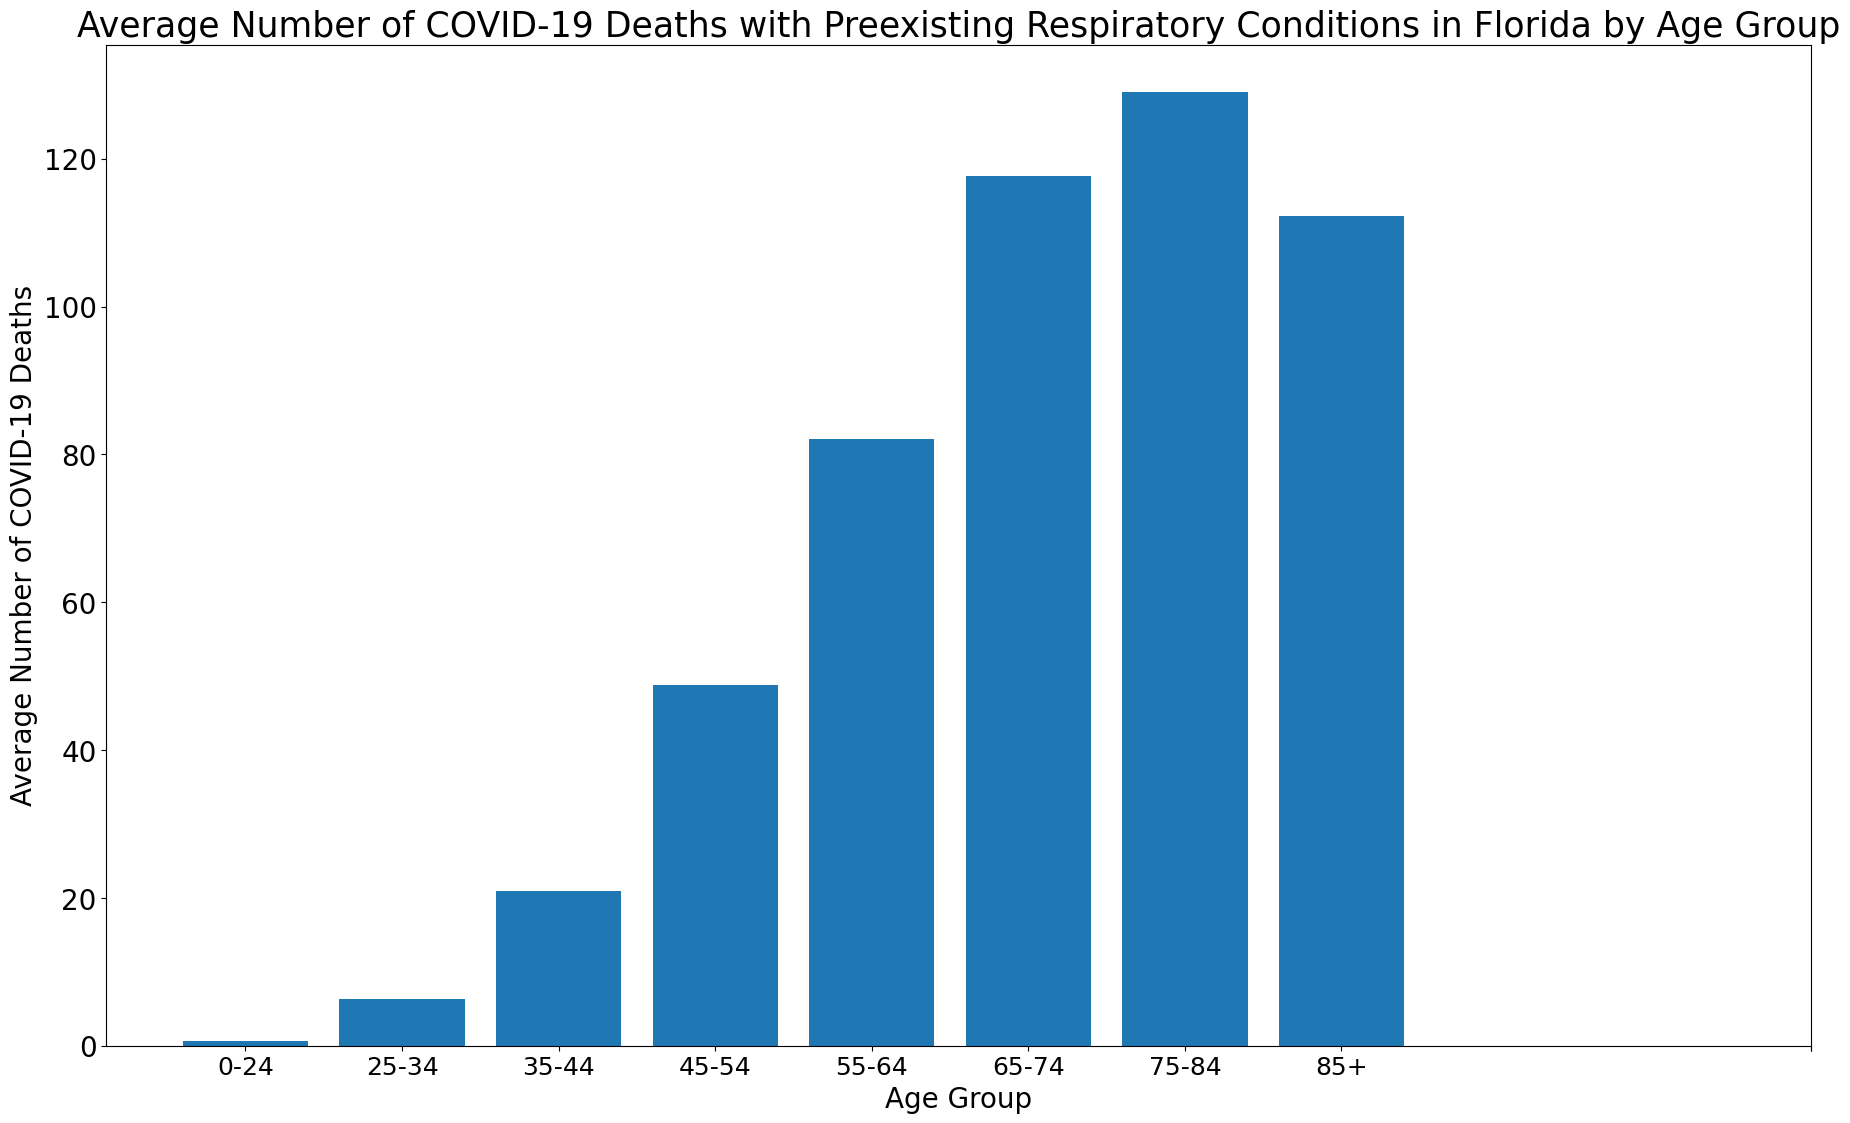

In [47]:

df_circulatory = df_month[(df_month['State']== "Florida") & (df_month['Condition Group']=='Respiratory diseases')]
df_circulatorydiseas = df_circulatory[(df_circulatory["Age Group"] != "All Ages") & (df_circulatory["Age Group"] != "Not Stated")]

# group the data by age group and calculate the average number of COVID-19 deaths
grouped_df = df_circulatorydiseas.groupby('Age Group')['COVID-19 Deaths'].mean().reset_index()

fig = plt.figure(figsize=(22, 13))

# plot the data
plt.bar(grouped_df['Age Group'], grouped_df['COVID-19 Deaths'])
plt.title('Average Number of COVID-19 Deaths with Preexisting Respiratory Conditions in Florida by Age Group',fontsize = 25)
plt.xlabel('Age Group',fontsize = 20)
plt.ylabel('Average Number of COVID-19 Deaths',fontsize = 20)
plt.xticks(["0-24","25-34","35-44","45-54","55-64","65-74","75-84","85+","",""],fontsize = 18)
plt.yticks(fontsize = 20)
plt.show()